In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import os
import sys

In [2]:
# ==== Пути ====
DATA_DIR = "../../data/checkpoints/exp14/vectorized_params"
PARAM_PATH = os.path.join(DATA_DIR, "params_matrix.npy")

# ==== Загрузка матрицы весов ====
params_matrix = np.load(PARAM_PATH)  # shape: (steps, dim)
print(f"Parameter matrix shape: {params_matrix.shape}")

# ==== Центрирование ====
X_centered = params_matrix - params_matrix.mean(axis=0)

Parameter matrix shape: (14070, 12730)


In [3]:
# ==== Разделение траектории на 5 отрезков ====
num_segments = 5
segment_size = len(params_matrix) // num_segments
segments = []

for i in range(num_segments):
    start_idx = i * segment_size
    end_idx = (i + 1) * segment_size if i < num_segments - 1 else len(params_matrix)
    segments.append(X_centered[start_idx:end_idx])
    
print(f"Divided trajectory into {num_segments} segments with approximately {segment_size} steps each")

Divided trajectory into 5 segments with approximately 2814 steps each


In [4]:
# ==== Функция для выполнения PCA и визуализации результатов ====
def analyze_pca_segment(segment, segment_idx):
    # Выполнение PCA
    pca = PCA(n_components=20)
    X_pca = pca.fit_transform(segment)
    
    # Вывод объясненной дисперсии
    print(f"\nSegment {segment_idx+1} results:")
    print("Explained variance ratios (first 10 components):")
    for i, var in enumerate(pca.explained_variance_ratio_[:10]):
        print(f"Component {i+1}: {var:.4f}")
    
    # Визуализация кумулятивной объясненной дисперсии
    plt.figure(figsize=(8, 4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel("Number of components")
    plt.ylabel("Cumulative explained variance")
    plt.title(f"PCA: Explained Variance (Segment {segment_idx+1})")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_DIR, f"explained_variance_segment_{segment_idx+1}.png"))
    plt.show()
    
    # Визуализация первых двух главных компонент
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"PCA: First two components (Segment {segment_idx+1})")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_DIR, f"pca_scatter_segment_{segment_idx+1}.png"))
    plt.show()
    
    # Визуализация различных пар главных компонент
    component_pairs = [(0, 1), (0, 2), (1, 2), (2, 3), (4, 5), (8, 9)]
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, (c1, c2) in enumerate(component_pairs):
        axes[i].scatter(X_pca[:, c1], X_pca[:, c2], alpha=0.5)
        axes[i].set_xlabel(f"PC{c1+1}")
        axes[i].set_ylabel(f"PC{c2+1}")
        axes[i].set_title(f"PC{c1+1} vs PC{c2+1} (Segment {segment_idx+1})")
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.savefig(os.path.join(DATA_DIR, f"pca_component_pairs_segment_{segment_idx+1}.png"))
    plt.show()
    
    return pca


Analyzing segment 1 with shape (2814, 12730)

Segment 1 results:
Explained variance ratios (first 10 components):
Component 1: 0.9557
Component 2: 0.0403
Component 3: 0.0029
Component 4: 0.0006
Component 5: 0.0001
Component 6: 0.0001
Component 7: 0.0000
Component 8: 0.0000
Component 9: 0.0000
Component 10: 0.0000


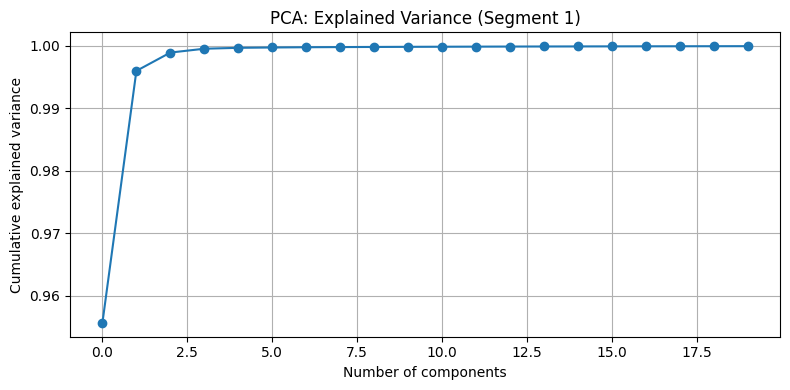

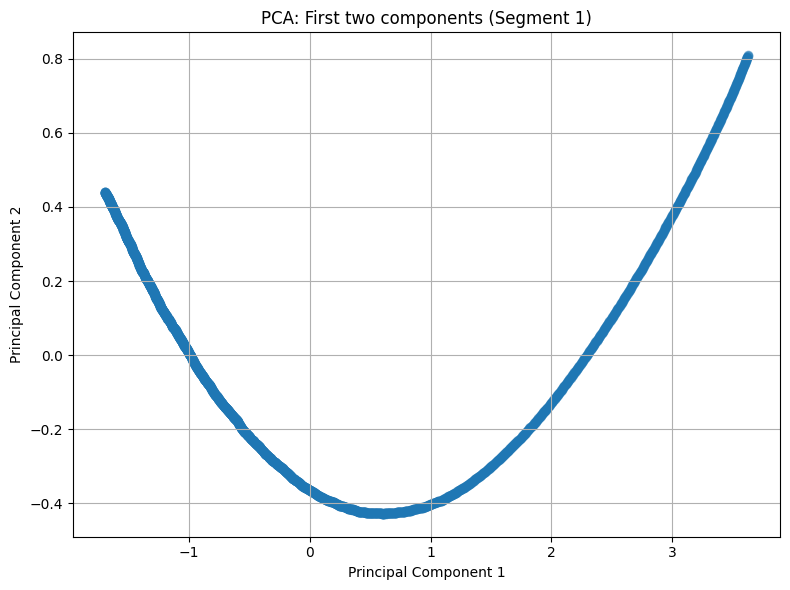

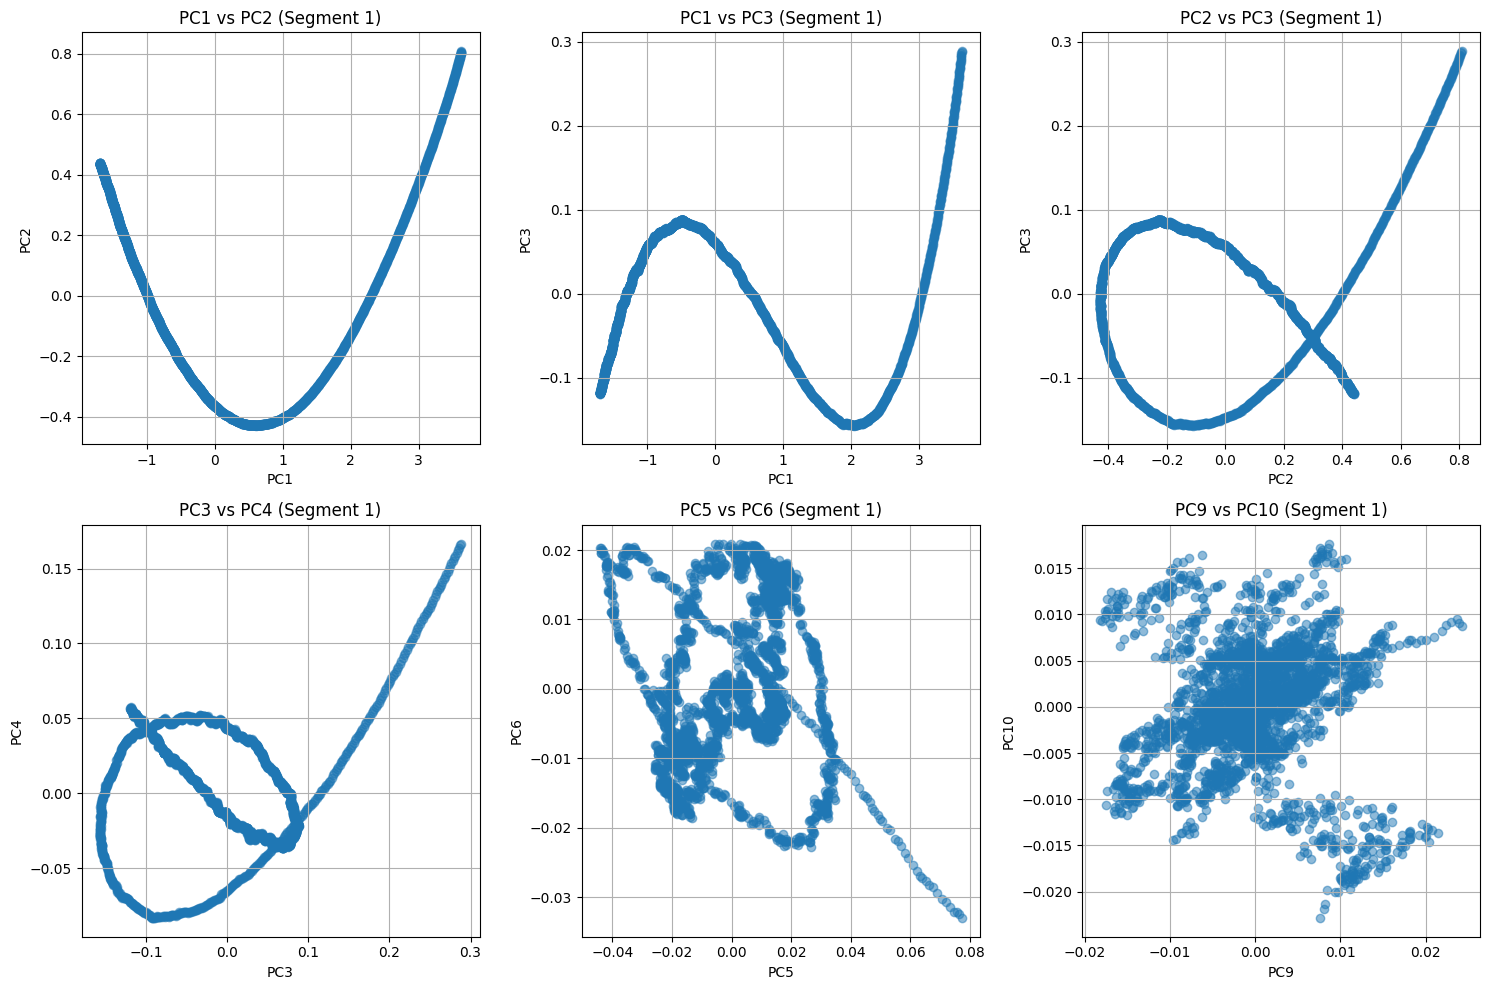


Analyzing segment 2 with shape (2814, 12730)

Segment 2 results:
Explained variance ratios (first 10 components):
Component 1: 0.9877
Component 2: 0.0050
Component 3: 0.0009
Component 4: 0.0008
Component 5: 0.0007
Component 6: 0.0004
Component 7: 0.0003
Component 8: 0.0003
Component 9: 0.0003
Component 10: 0.0002


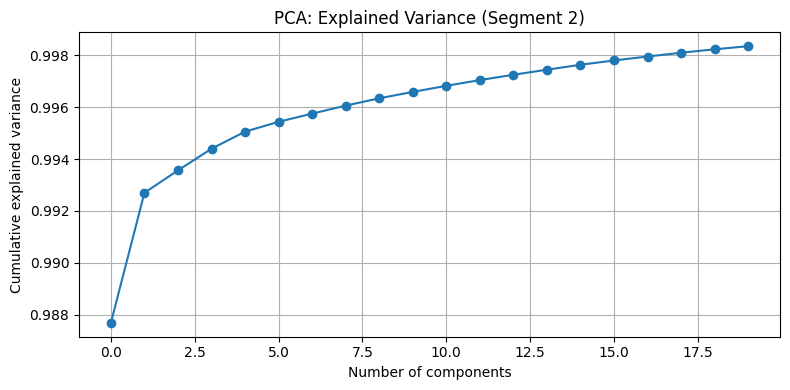

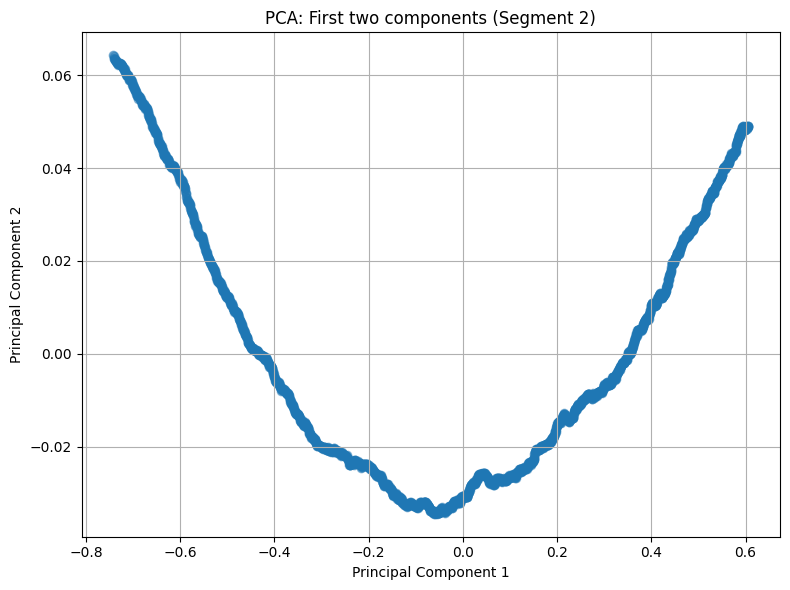

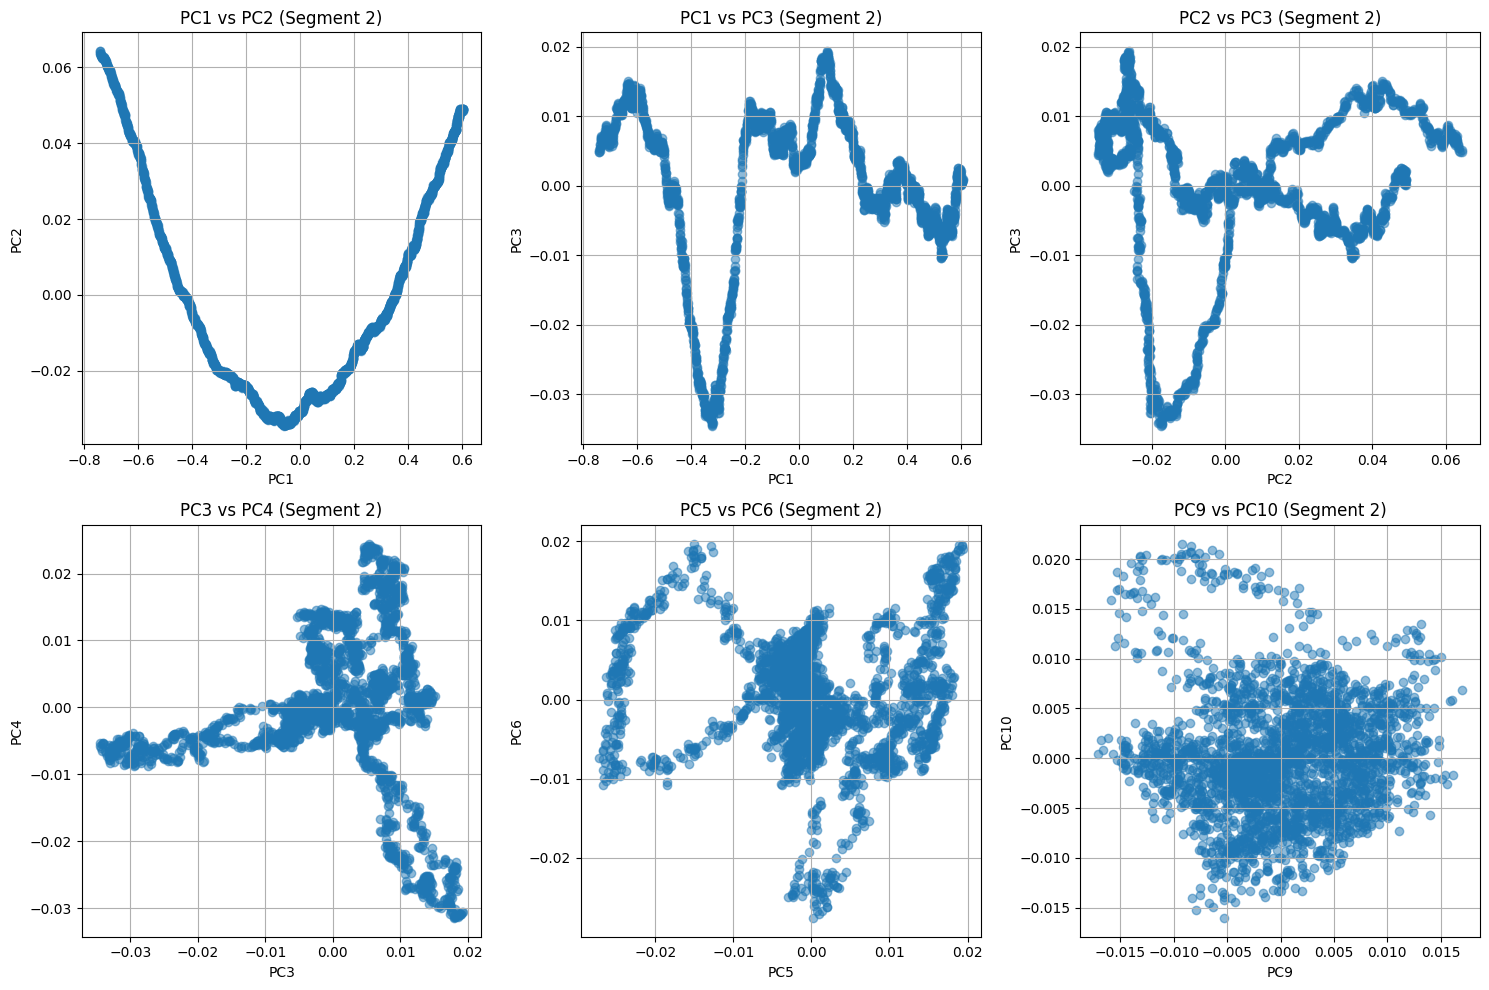


Analyzing segment 3 with shape (2814, 12730)

Segment 3 results:
Explained variance ratios (first 10 components):
Component 1: 0.9794
Component 2: 0.0033
Component 3: 0.0020
Component 4: 0.0017
Component 5: 0.0015
Component 6: 0.0011
Component 7: 0.0008
Component 8: 0.0008
Component 9: 0.0007
Component 10: 0.0006


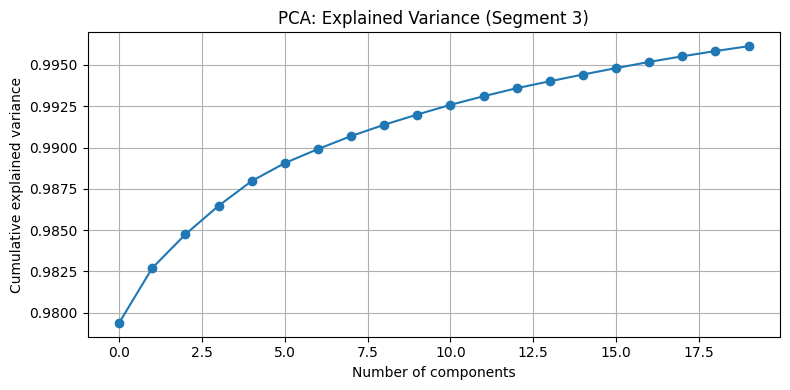

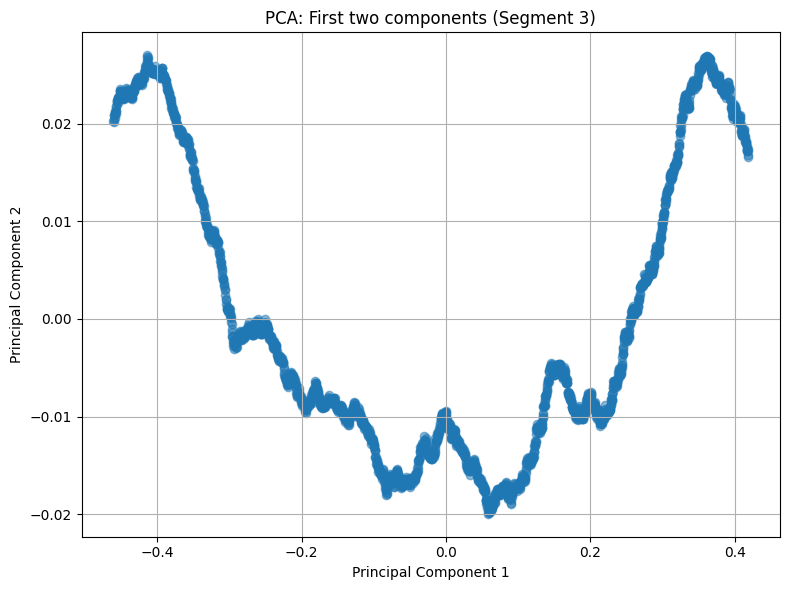

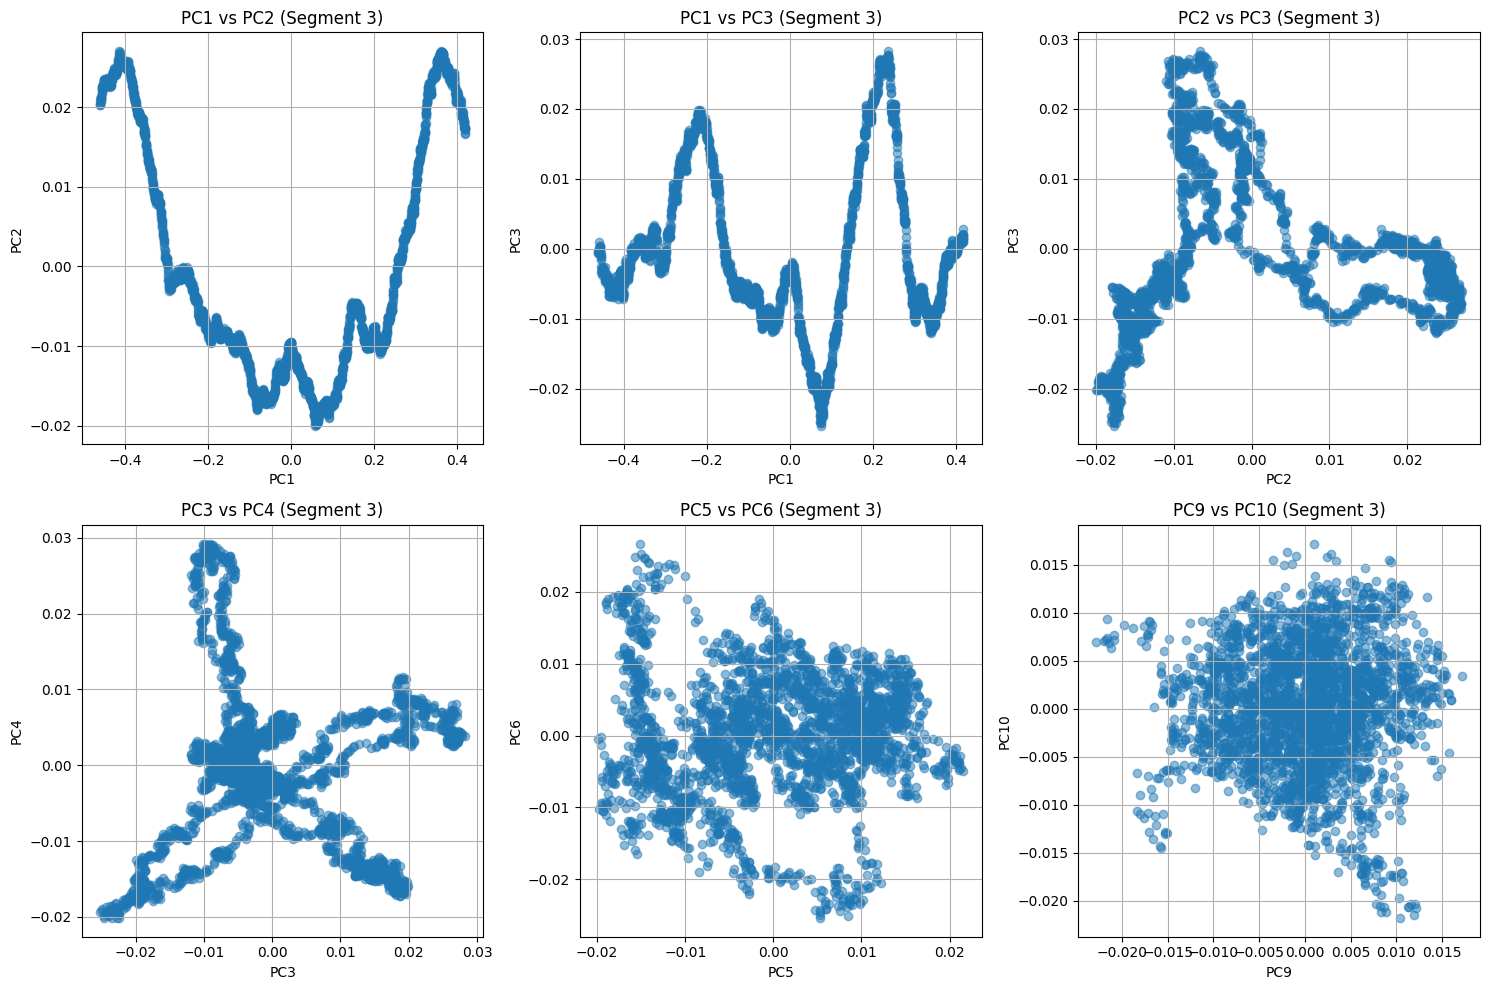


Analyzing segment 4 with shape (2814, 12730)

Segment 4 results:
Explained variance ratios (first 10 components):
Component 1: 0.9688
Component 2: 0.0039
Component 3: 0.0030
Component 4: 0.0027
Component 5: 0.0024
Component 6: 0.0017
Component 7: 0.0015
Component 8: 0.0013
Component 9: 0.0012
Component 10: 0.0010


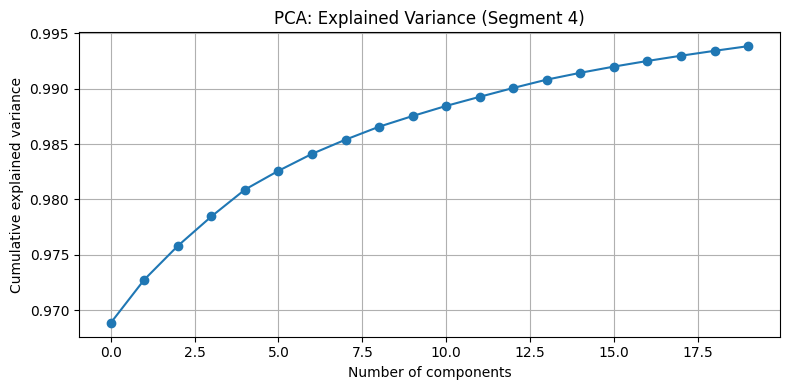

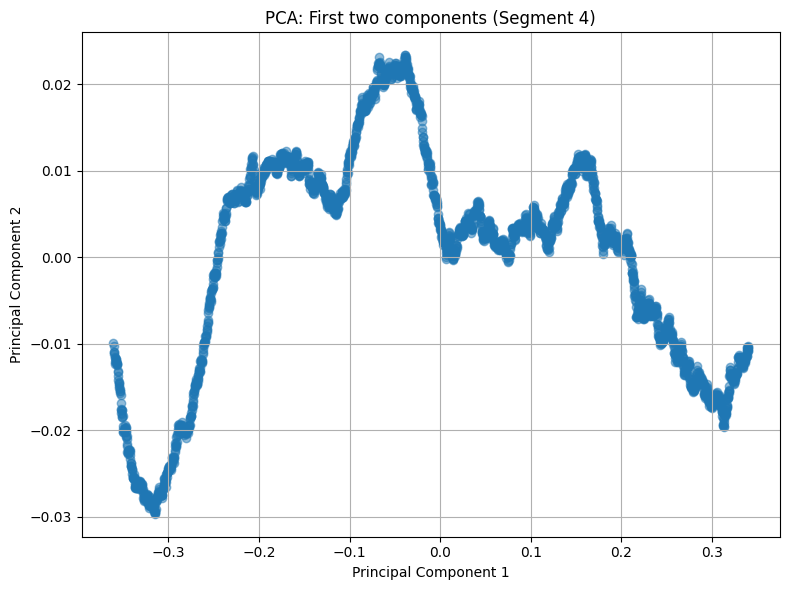

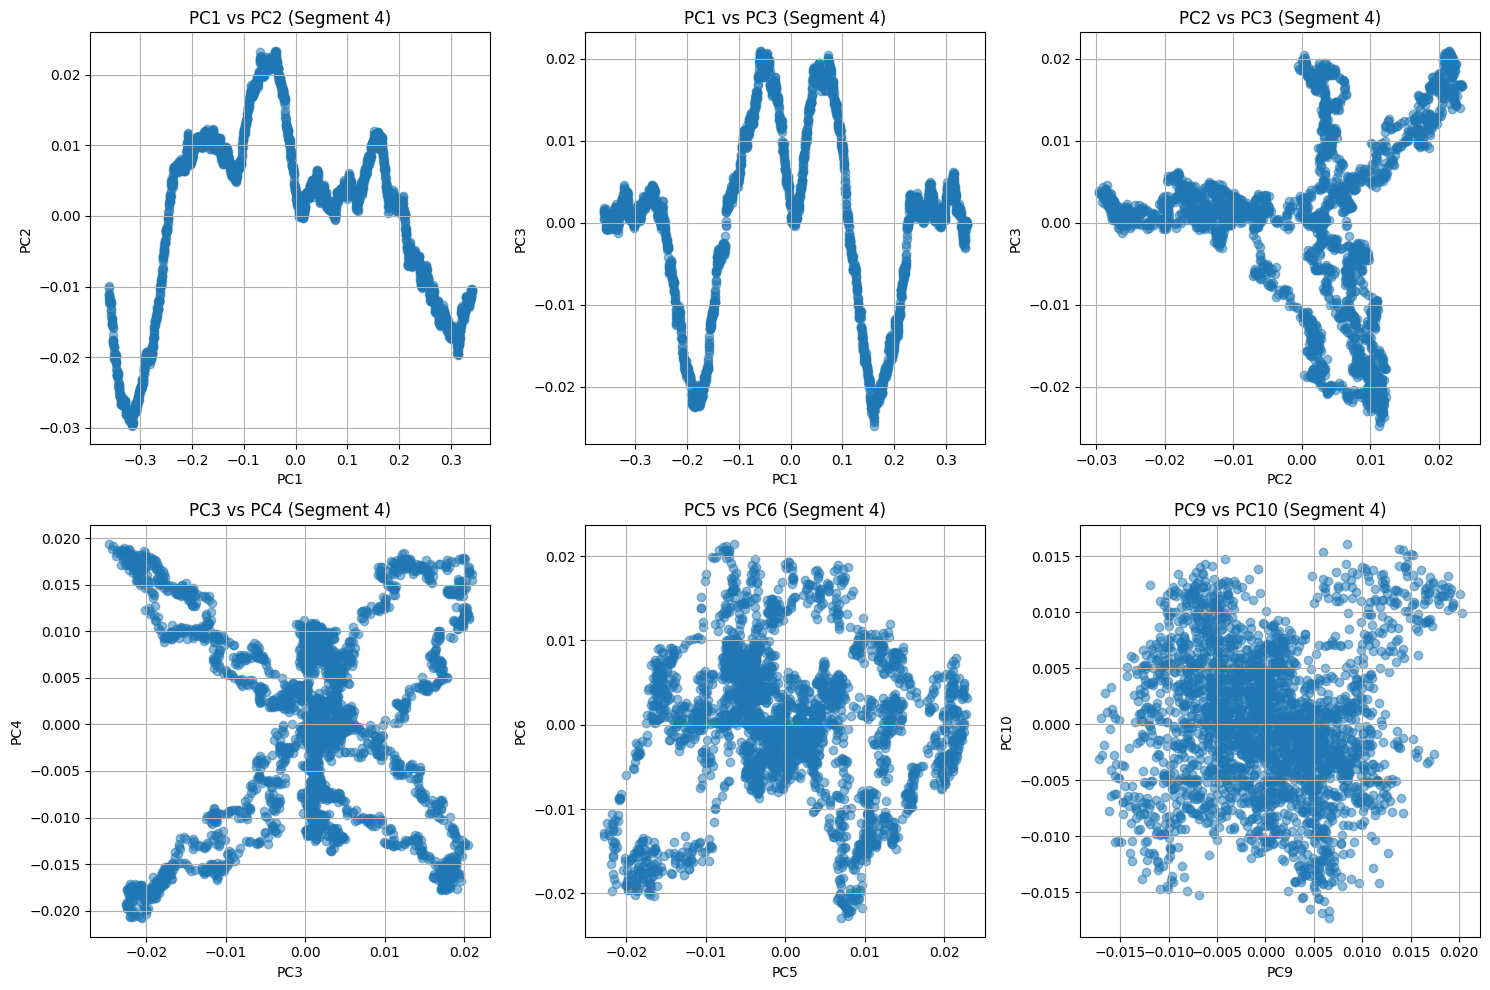


Analyzing segment 5 with shape (2814, 12730)

Segment 5 results:
Explained variance ratios (first 10 components):
Component 1: 0.9597
Component 2: 0.0047
Component 3: 0.0044
Component 4: 0.0036
Component 5: 0.0032
Component 6: 0.0021
Component 7: 0.0017
Component 8: 0.0015
Component 9: 0.0014
Component 10: 0.0012


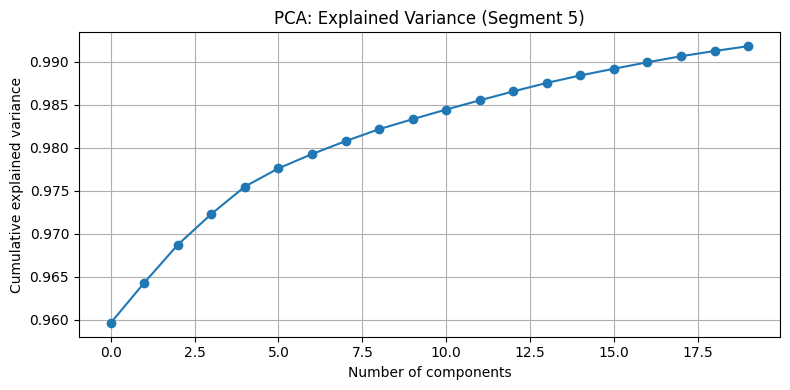

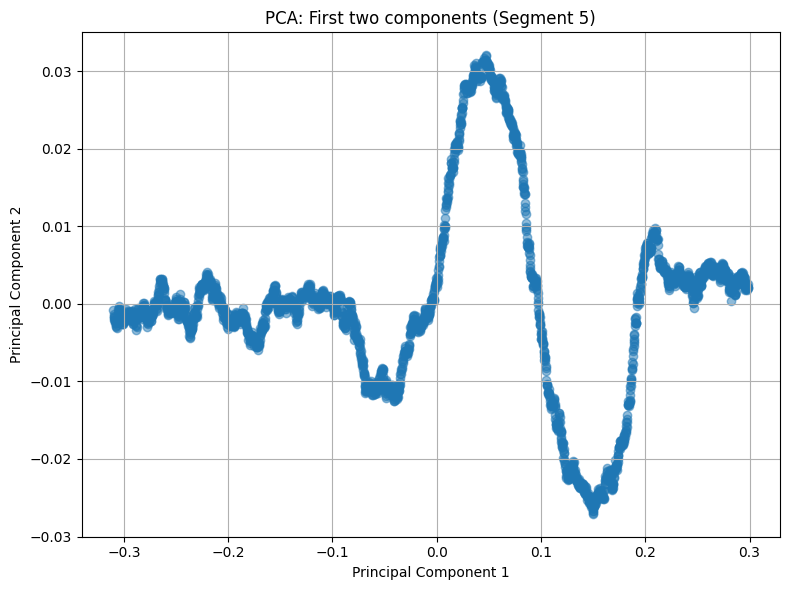

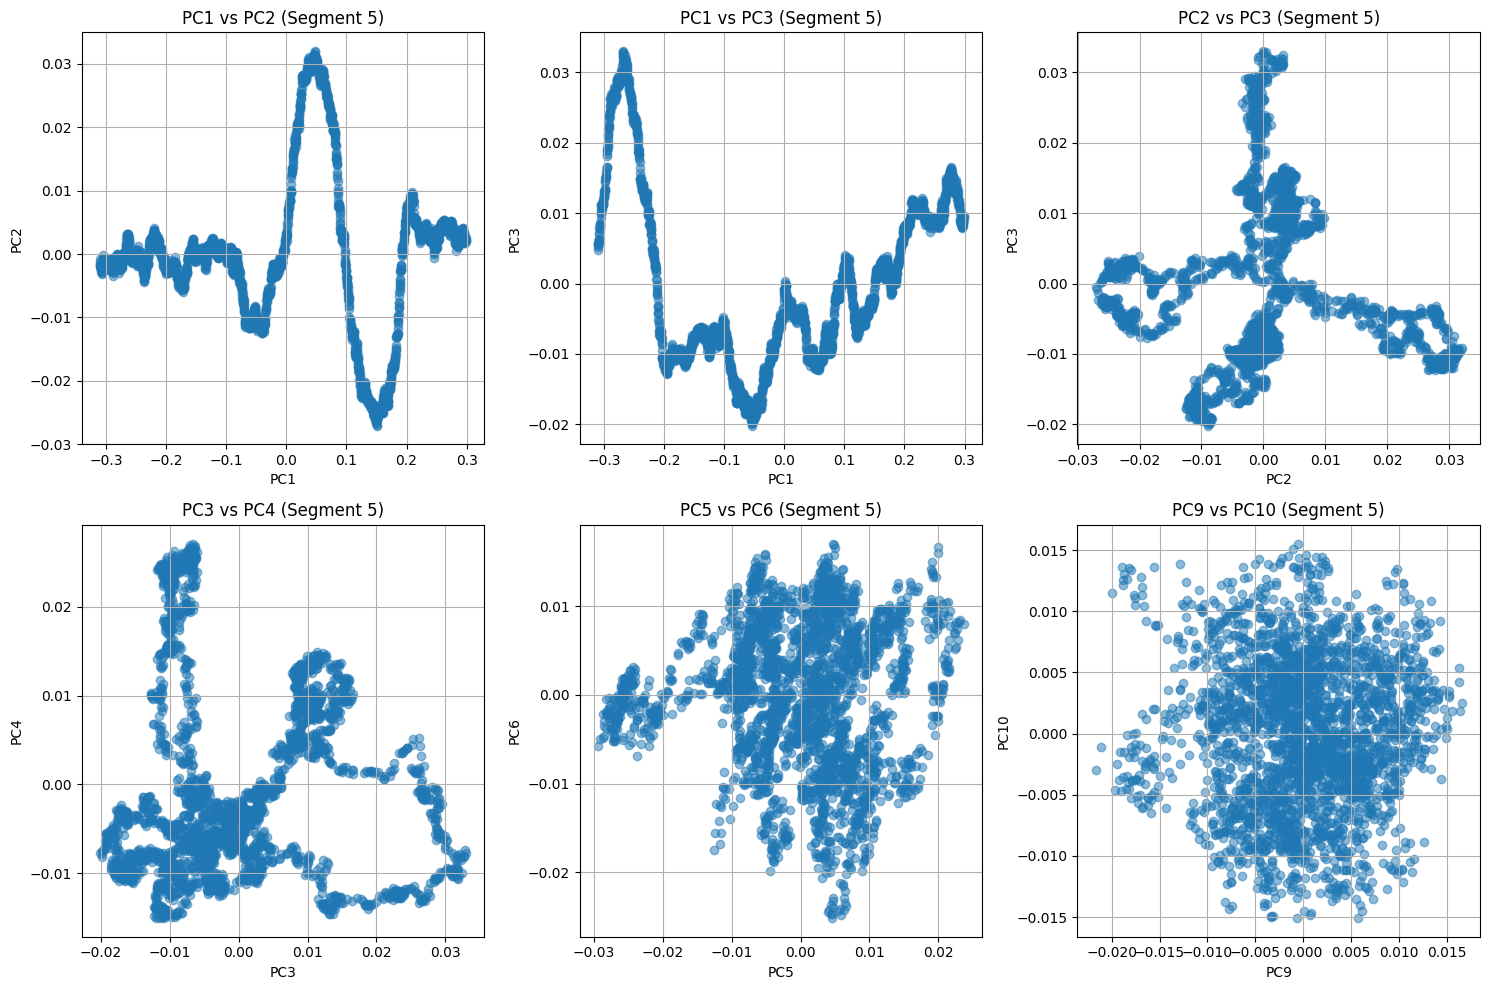

In [5]:
# ==== Анализ каждого сегмента ====
pca_results = []
for i, segment in enumerate(segments):
    print(f"\nAnalyzing segment {i+1} with shape {segment.shape}")
    pca = analyze_pca_segment(segment, i)
    pca_results.append(pca)

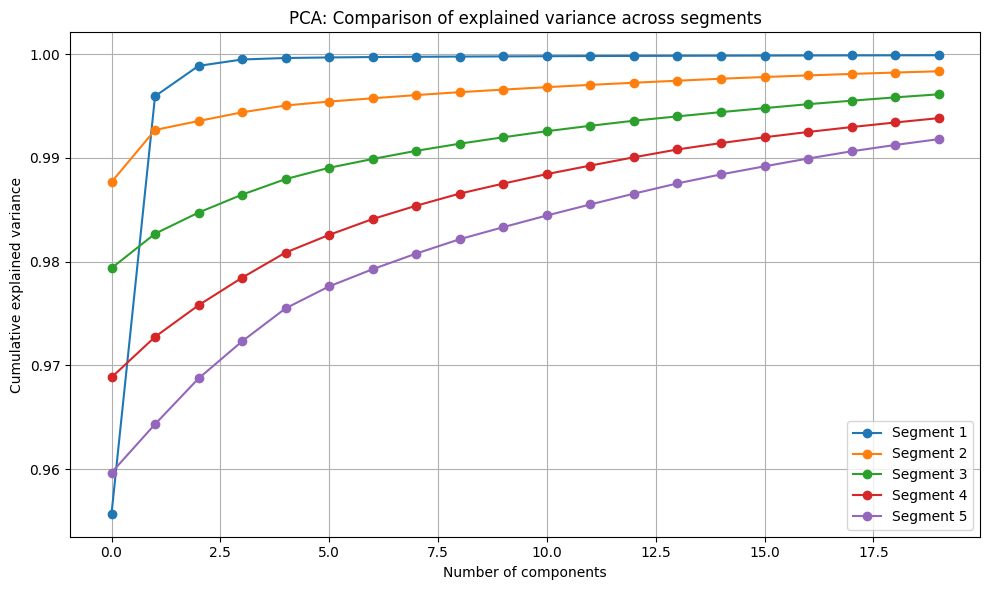

In [7]:
# ==== Сравнение объясненной дисперсии между сегментами ====
plt.figure(figsize=(10, 6))
for i, pca in enumerate(pca_results):
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', label=f"Segment {i+1}")

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA: Comparison of explained variance across segments")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(DATA_DIR, "pca_comparison_segments.png"))
plt.show()

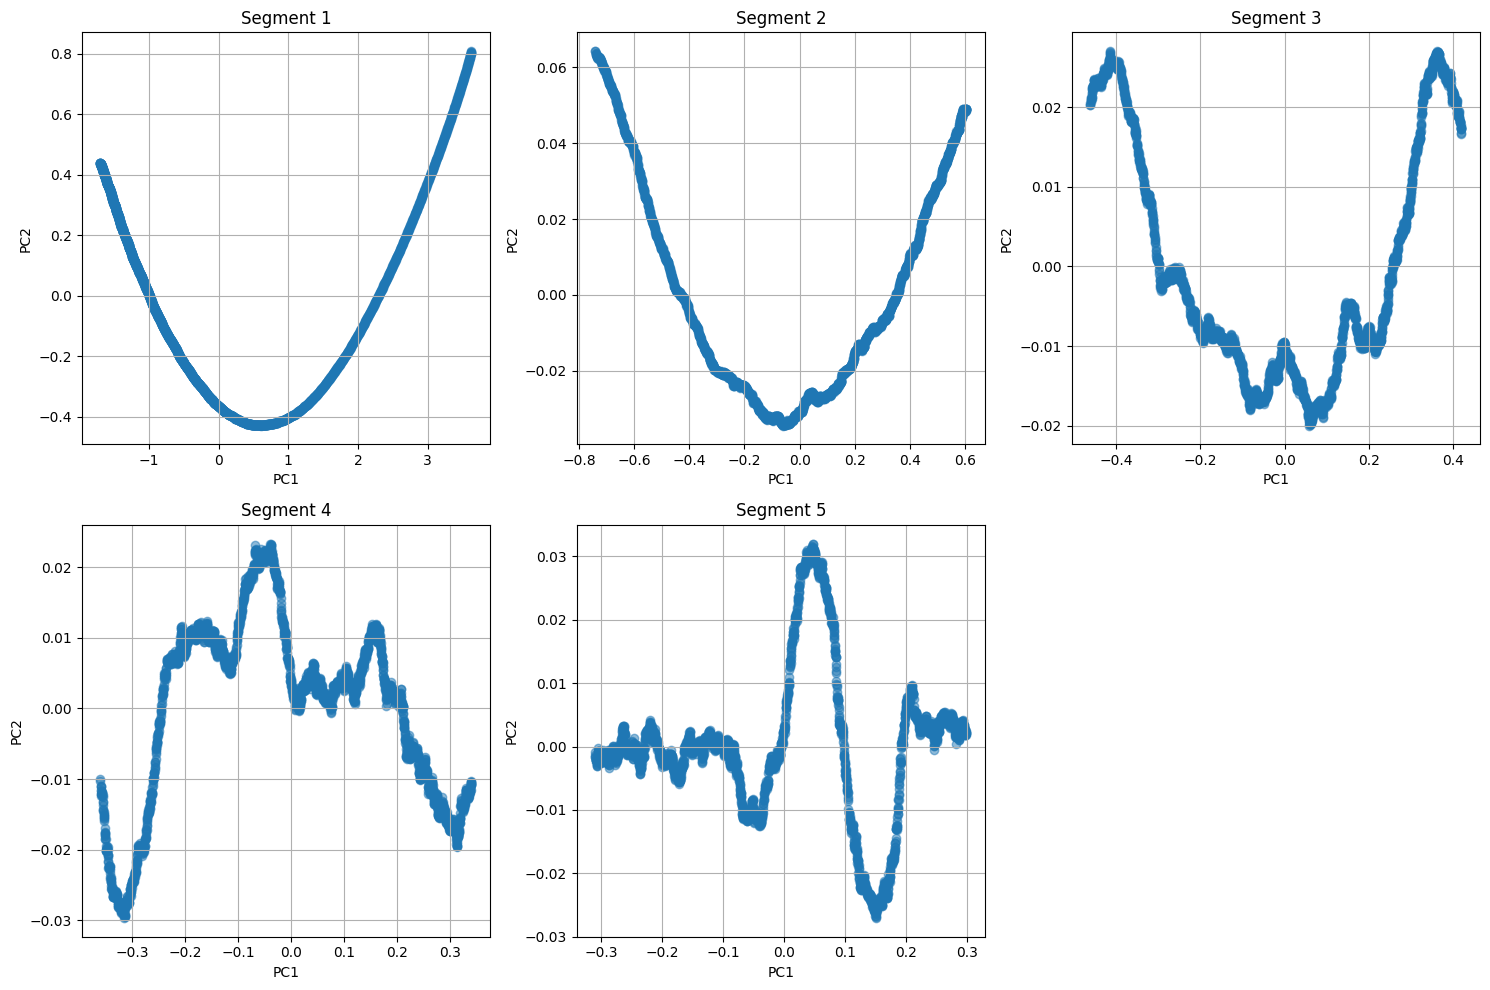

In [8]:
# ==== Сравнение первых двух компонент для каждого сегмента ====
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Для каждого сегмента
for i, segment in enumerate(segments):
    if i < len(axes):
        # Выполнение PCA для текущего сегмента
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(segment)
        
        # Визуализация
        axes[i].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
        axes[i].set_title(f"Segment {i+1}")
        axes[i].set_xlabel("PC1")
        axes[i].set_ylabel("PC2")
        axes[i].grid(True)

# Скрыть пустой график, если есть
if len(segments) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.savefig(os.path.join(DATA_DIR, "pca_segments_comparison.png"))
plt.show()

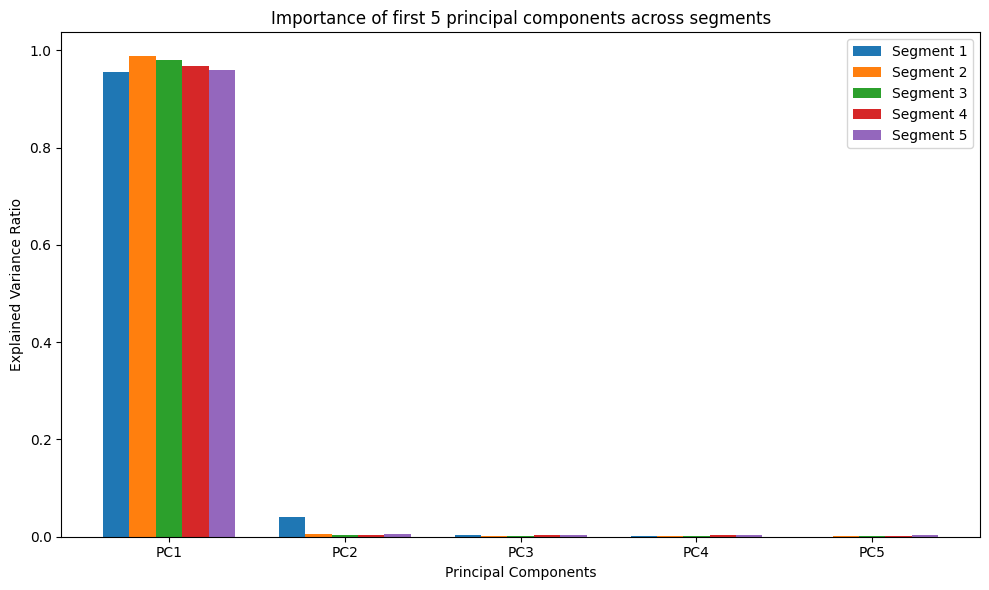

In [9]:
# ==== Анализ важности компонент по сегментам ====
plt.figure(figsize=(10, 6))
bar_width = 0.15
index = np.arange(5)  # 5 первых компонент

for i, pca in enumerate(pca_results):
    plt.bar(index + i*bar_width, pca.explained_variance_ratio_[:5], bar_width,
            label=f'Segment {i+1}')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Importance of first 5 principal components across segments')
plt.xticks(index + bar_width * (num_segments-1)/2, [f'PC{i+1}' for i in range(5)])
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(DATA_DIR, "pca_component_importance.png"))
plt.show()

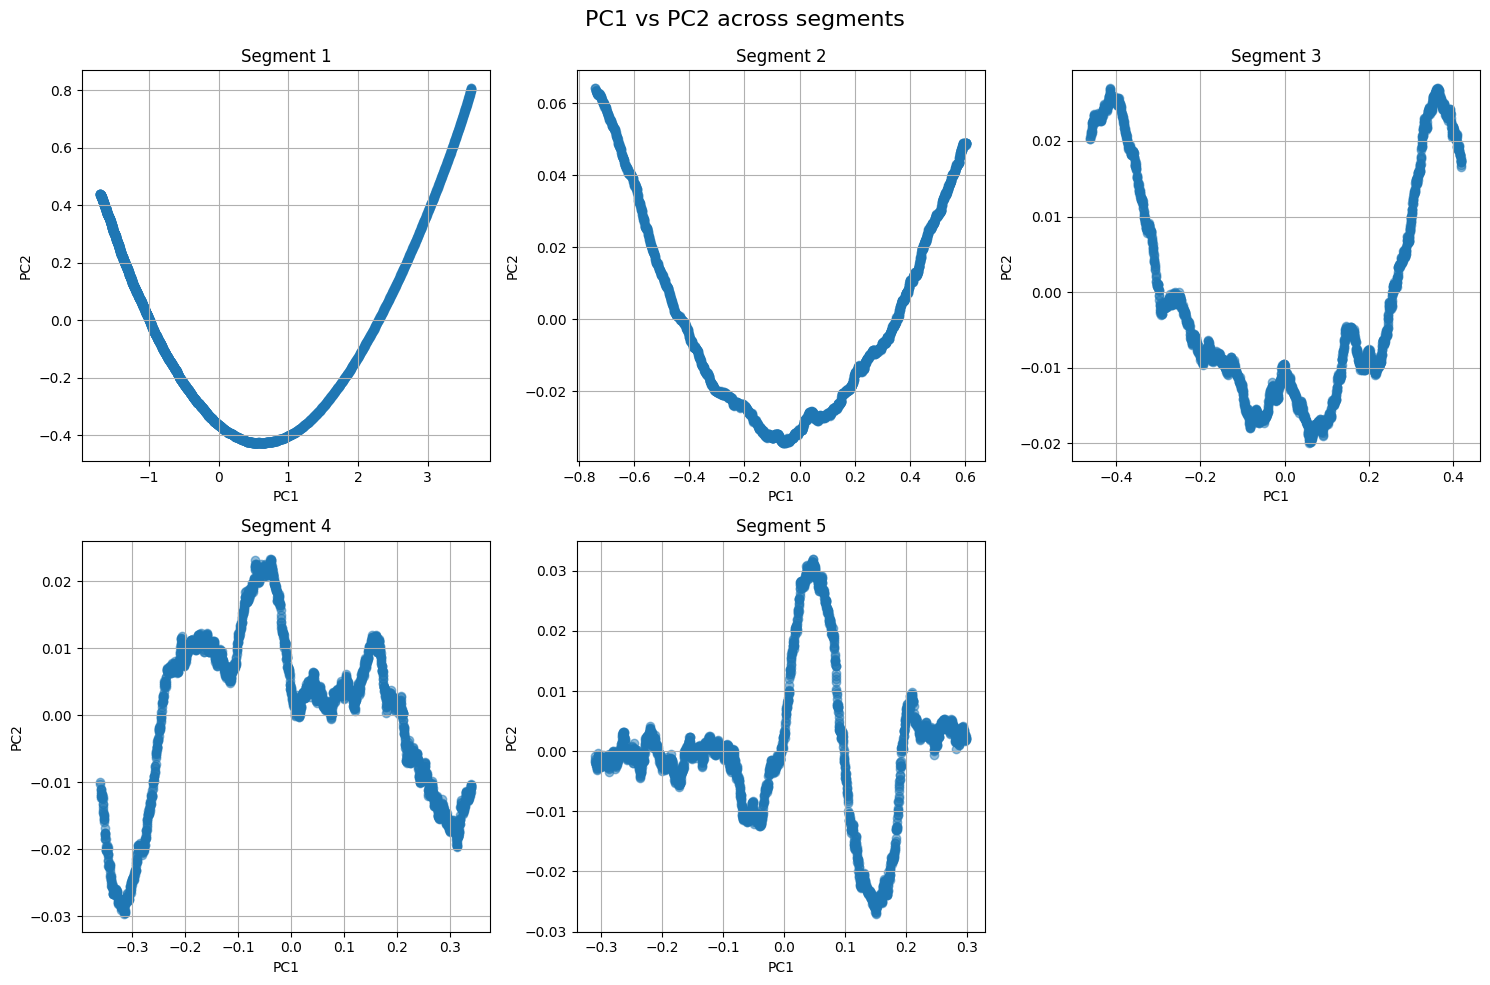

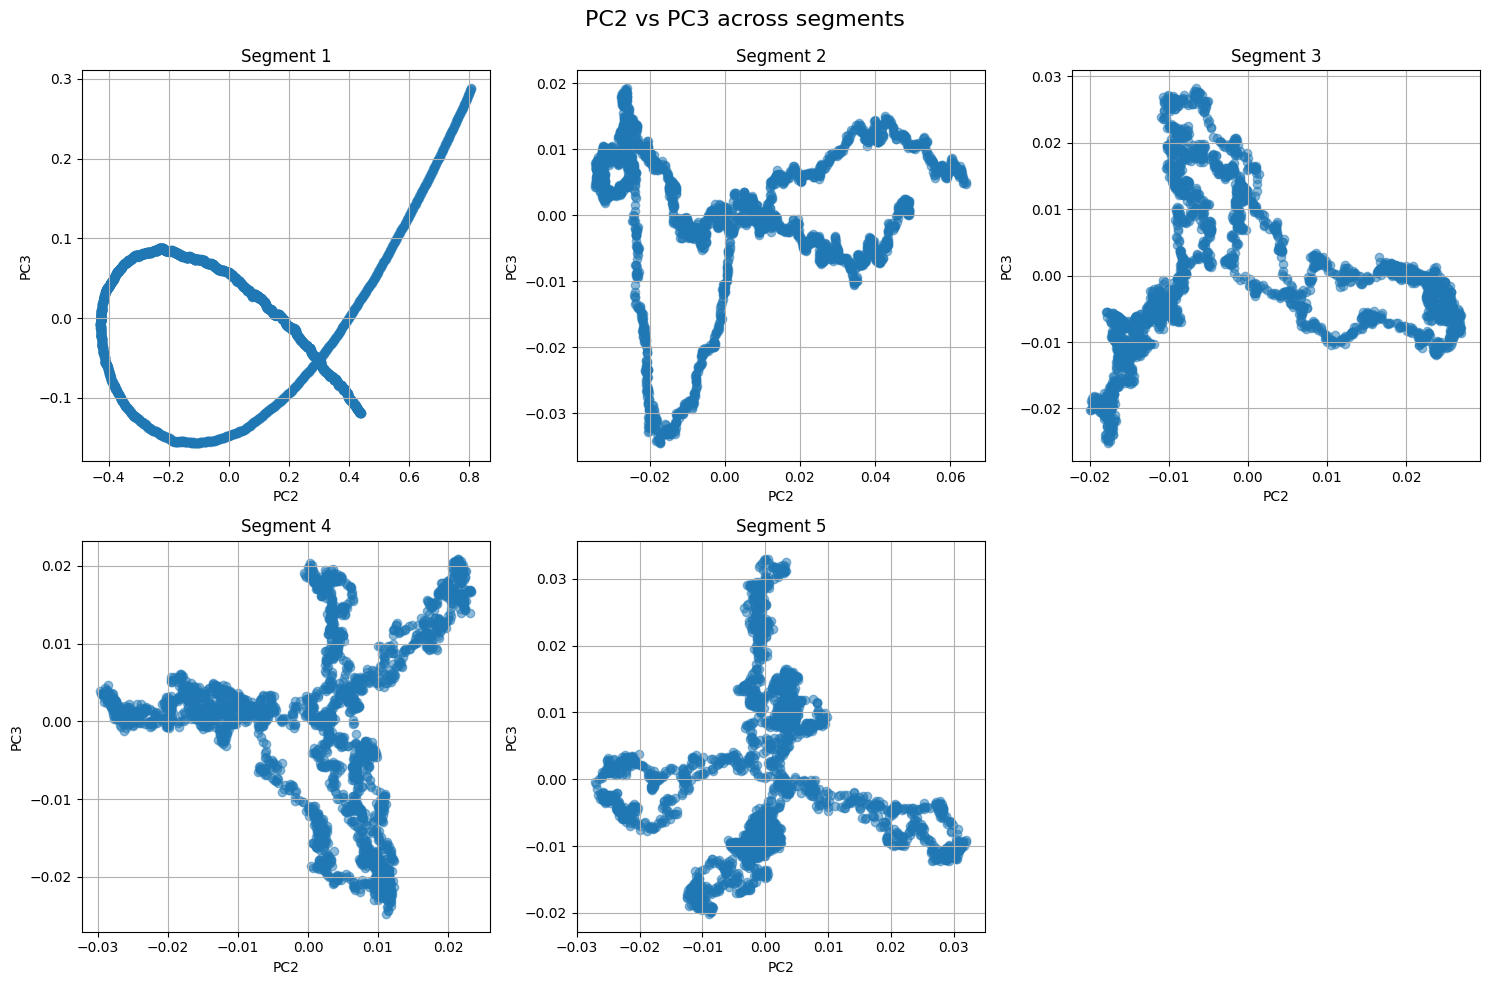

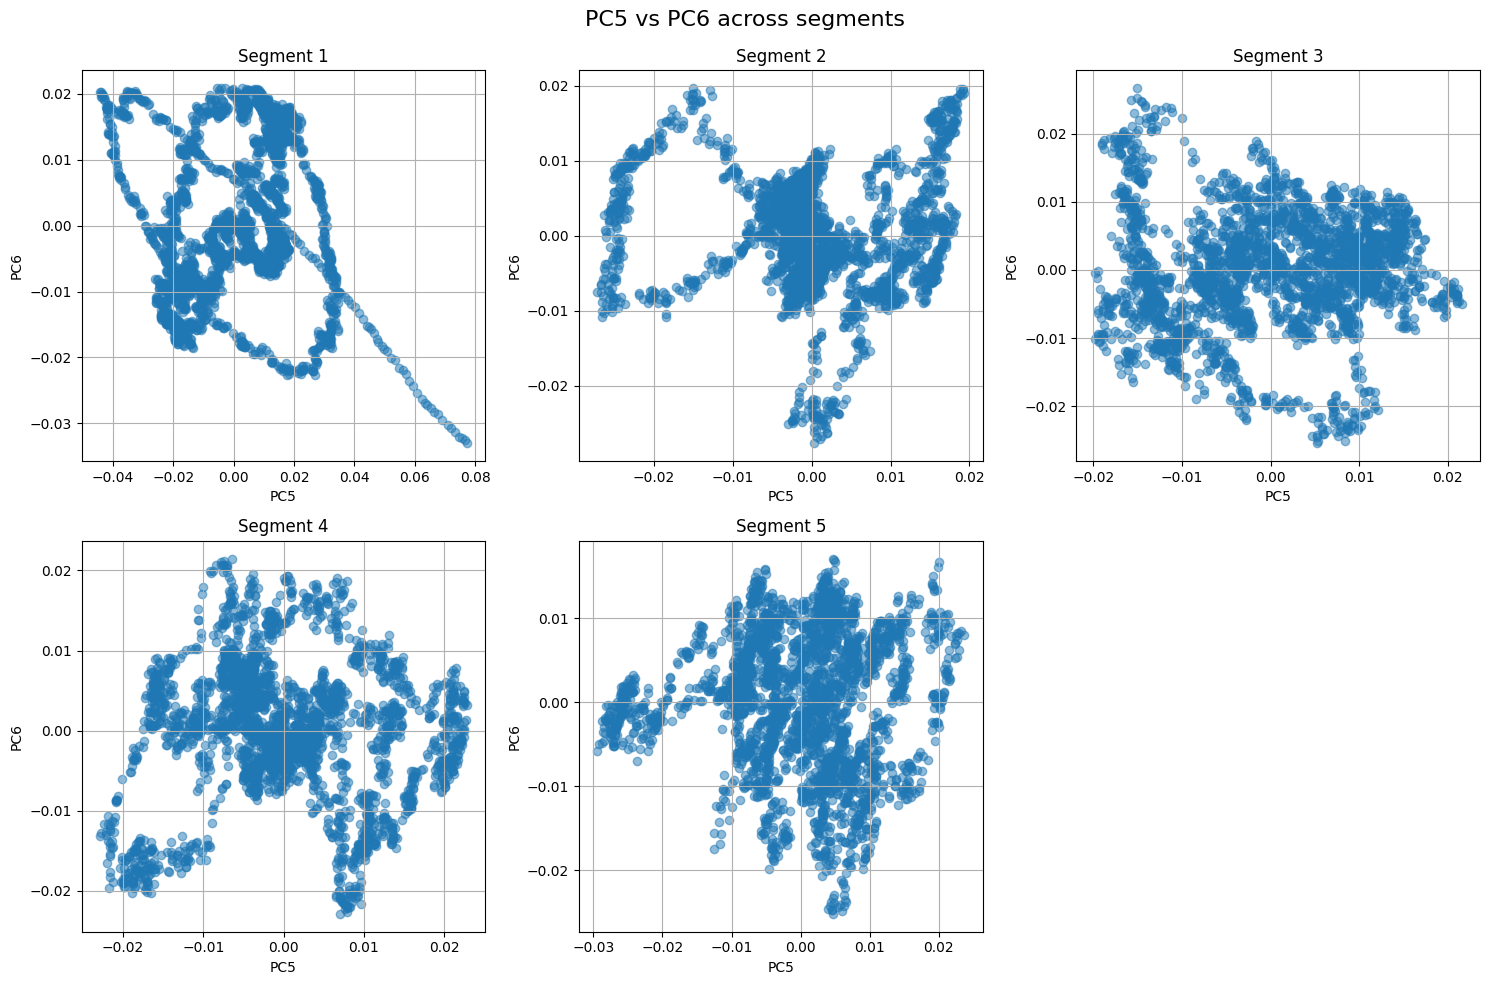

In [10]:
# ==== Сравнение различных пар компонент между сегментами ====
# Выберем несколько интересных пар компонент для сравнения
component_pairs_to_compare = [(0, 1), (1, 2), (4, 5)]

for c1, c2 in component_pairs_to_compare:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, segment in enumerate(segments):
        if i < len(axes):
            # Выполнение PCA для текущего сегмента
            pca = PCA(n_components=max(c1, c2) + 1)
            X_pca = pca.fit_transform(segment)
            
            # Визуализация
            axes[i].scatter(X_pca[:, c1], X_pca[:, c2], alpha=0.5)
            axes[i].set_title(f"Segment {i+1}")
            axes[i].set_xlabel(f"PC{c1+1}")
            axes[i].set_ylabel(f"PC{c2+1}")
            axes[i].grid(True)
    
    # Скрыть пустые графики, если есть
    for j in range(len(segments), len(axes)):
        axes[j].axis('off')
    
    plt.suptitle(f"PC{c1+1} vs PC{c2+1} across segments", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)
    plt.savefig(os.path.join(DATA_DIR, f"pca_pc{c1+1}_pc{c2+1}_comparison.png"))
    plt.show()